m
0.9999412652170467
merr
0.0005184225688931391
q
0.0005689869489106691
qerr
0.0028880763027672846


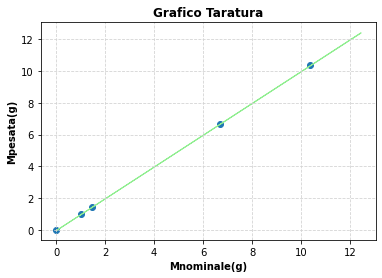

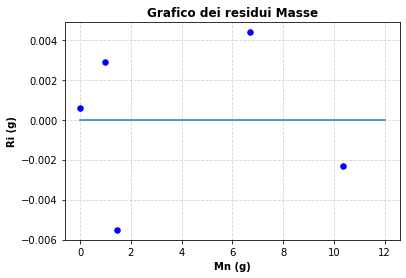

Errore = MaxResidui/sqrt(3)
0.00382446019831234
sigma_post_fit
0.004612983816018038


In [1]:
#CALCOLO TARATURA
import numpy as np
import matplotlib.pyplot as plt

Mn = np.array([0,0.9974,6.6942,10.3577,1.444])
Mp = np.array([0,0.995,6.69,10.36,1.45])

fit,cov = np.polyfit(Mn,Mp,1,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit

x = np.linspace(min(Mn),max(Mn)*1.2,1000)

print("m")
print(m)
print("merr")
print(merr)
print("q")
print(q)
print("qerr")
print(qerr)



y = q + m*x 

y_erroreMin = (q-qerr) + (m-merr)*x

y_erroreMax = (q+qerr) + (m+merr)*x

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico Taratura",fontweight="bold")
plt.scatter(Mn,Mp)
plt.xlabel("Mnominale(g)",fontweight="bold")
plt.ylabel("Mpesata(g)",fontweight="bold")
plt.fill_between(x,y_erroreMin,y_erroreMax, color="lightgreen",zorder=1)
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
fig.savefig(f'Fitting_Taratura.pdf',dpi = 300)

Mf = q+m*Mn

Ri = Mf-Mp

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui Masse",fontweight="bold")
plt.xlabel("Mn (g)",fontweight="bold")
plt.ylabel("Ri (g)",fontweight="bold")
plt.plot(np.linspace(0,12,1000),np.zeros(1000))
plt.scatter(Mn,Ri, s=30, color='blue',zorder=3)
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
fig.savefig(f'Residui_Taratura.pdf',dpi = 300)



MaxResidui = np.abs(Ri)



print("Errore = MaxResidui/sqrt(3)")
print(np.max(MaxResidui)/3**(1/3))


sigma_post_fit = (np.sum((Mf-Mp)**2)/(len(Mf)-2))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)